In [25]:
pip install pennylane --upgrade

In [26]:
import numpy as np
import pennylane as qml
import matplotlib.pyplot as plt

1. ReadXanaduQuantumCodebookI.10Tutorialandcomplete4exercises. (4points) https://codebook.xanadu.ai/I.10
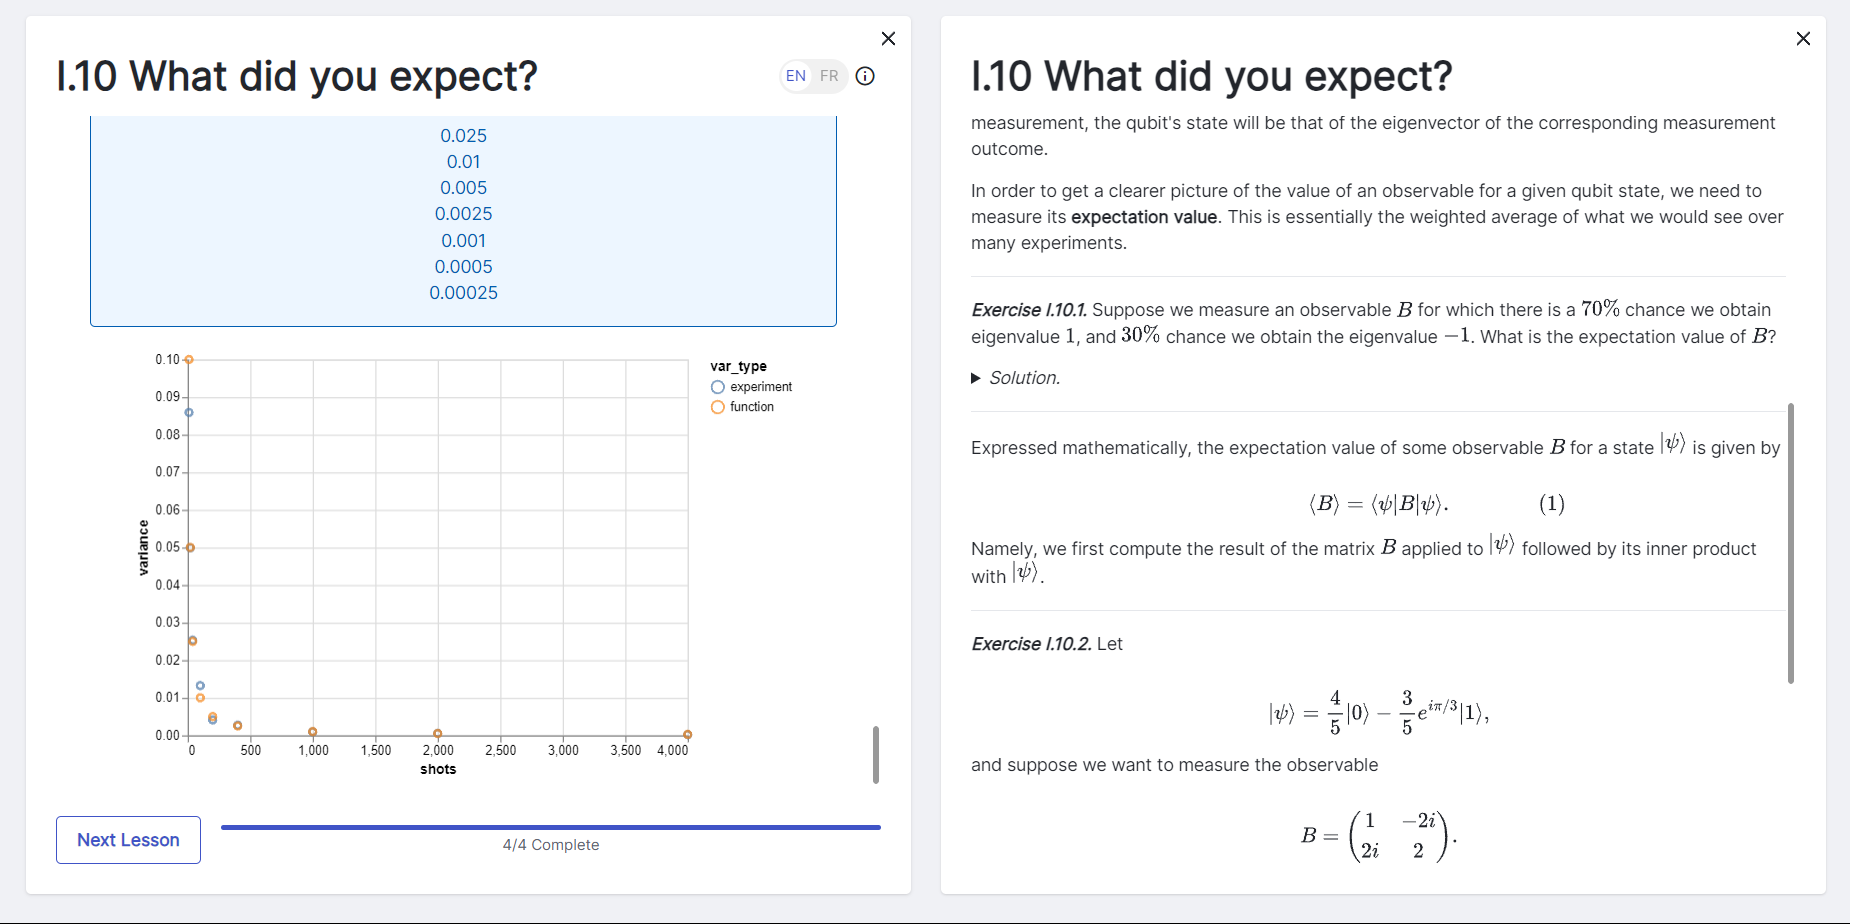

In [27]:
dev = qml.device('default.qubit', wires=1)

@qml.qnode(dev)
def circuit():
    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE CIRCUIT IN THE PICTURE AND MEASURE PAULI Y
    qml.RX(np.pi/4, wires = 0)
    qml.Hadamard(wires = 0)
    qml.Z(wires = 0)
    return qml.expval(qml.PauliY(wires=0))

print(circuit())


-0.7071067811865471


In [28]:
# An array to store your results
shot_results = []

# Different numbers of shots
shot_values = [100, 1000, 10000, 100000, 1000000]
dev = qml.device('default.qubit', wires=1)
@qml.qnode(dev)
def circuit():
    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE CIRCUIT IN THE PICTURE AND MEASURE PAULI Y
    qml.RX(np.pi/4, wires = 0)
    qml.Hadamard(wires = 0)
    qml.Z(wires = 0)
    return qml.expval(qml.PauliY(wires=0))

for shots in shot_values:
    ##################
    # YOUR CODE HERE #
    ##################

    # CREATE A DEVICE, CREATE A QNODE, AND RUN IT
    dev = qml.device('default.qubit', wires=1, shots=shots)
    result = circuit()
    # STORE RESULT IN SHOT_RESULTS ARRAY
    shot_results.append(result)

print(qml.math.unwrap(shot_results))


[-0.7071067811865471, -0.7071067811865471, -0.7071067811865471, -0.7071067811865471, -0.7071067811865471]


In [29]:
dev = qml.device("default.qubit", wires=1, shots=100000)

@qml.qnode(dev)
def circuit():
    qml.RX(np.pi/4, wires=0)
    qml.Hadamard(wires=0)
    qml.PauliZ(wires=0)

    ##################
    # YOUR CODE HERE #
    ##################

    # RETURN THE MEASUREMENT SAMPLES OF THE CORRECT OBSERVABLE

    return qml.sample(qml.PauliY(wires=0))


def compute_expval_from_samples(samples):
    """Compute the expectation value of an observable given a set of
    sample outputs. You can assume that there are two possible outcomes,
    1 and -1.

    Args:
        samples (array[float]): 100000 samples representing the results of
            running the above circuit.

    Returns:
        float: the expectation value computed based on samples.
    """

    estimated_expval = 0

    ##################
    # YOUR CODE HERE #
    ##################

    # USE THE SAMPLES TO ESTIMATE THE EXPECTATION VALUE
    estimated_expval = np.mean(samples)
    return estimated_expval


samples = circuit()
print(compute_expval_from_samples(samples))


-0.70802


0.1
0.05
0.025
0.01
0.005
0.0025
0.001
0.0005
0.00025


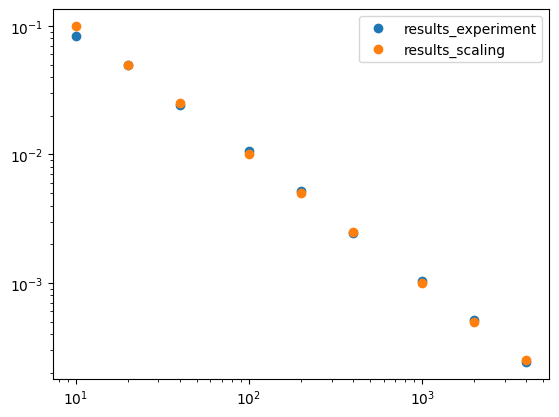

In [30]:
def variance_experiment(n_shots):
    """Run an experiment to determine the variance in an expectation
    value computed with a given number of shots.

    Args:
        n_shots (int): The number of shots

    Returns:
        float: The variance in expectation value we obtain running the
        circuit 100 times with n_shots shots each.
    """

    # To obtain a variance, we run the circuit multiple times at each shot value.
    n_trials = 100

    ##################
    # YOUR CODE HERE #
    ##################

    # CREATE A DEVICE WITH GIVEN NUMBER OF SHOTS
    dev = qml.device("default.qubit", wires=1, shots=n_shots)

    # DECORATE THE CIRCUIT BELOW TO CREATE A QNODE
    @qml.qnode(dev)
    def circuit():
        qml.Hadamard(wires=0)
        return qml.expval(qml.PauliZ(wires=0))

    # RUN THE QNODE N_TRIALS TIMES AND RETURN THE VARIANCE OF THE RESULTS
    results = [circuit().numpy() for i in range(n_trials)]
    return np.var(results)


def variance_scaling(n_shots):
    """Once you have determined how the variance in expectation value scales
    with the number of shots, complete this function to programmatically
    represent the relationship.

    Args:
        n_shots (int): The number of shots

    Returns:
        float: The variance in expectation value we expect to see when we run
        an experiment with n_shots shots.
    """

    estimated_variance = 0

    ##################
    # YOUR CODE HERE #
    ##################

    # ESTIMATE THE VARIANCE BASED ON SHOT NUMBER
    estimated_variance = 1/(n_shots)
    print(estimated_variance)
    return (estimated_variance)

# Various numbers of shots; you can change this
shot_vals = [10, 20, 40, 100, 200, 400, 1000, 2000, 4000]

# Used to plot your results
results_experiment = [variance_experiment(shots) for shots in shot_vals]
results_scaling = [variance_scaling(shots) for shots in shot_vals]
#plot = plotter(shot_vals, results_experiment, results_scaling)
plt.plot(shot_vals, results_experiment,"o", label = "results_experiment")
plt.plot(shot_vals, results_scaling,"o", label = "results_scaling")
plt.loglog()
plt.legend()
plt.show()

2. ReadXanaduQuantumCodebookI.11Tutorialandcomplete4exercises. (4points) https://codebook.xanadu.ai/I.11
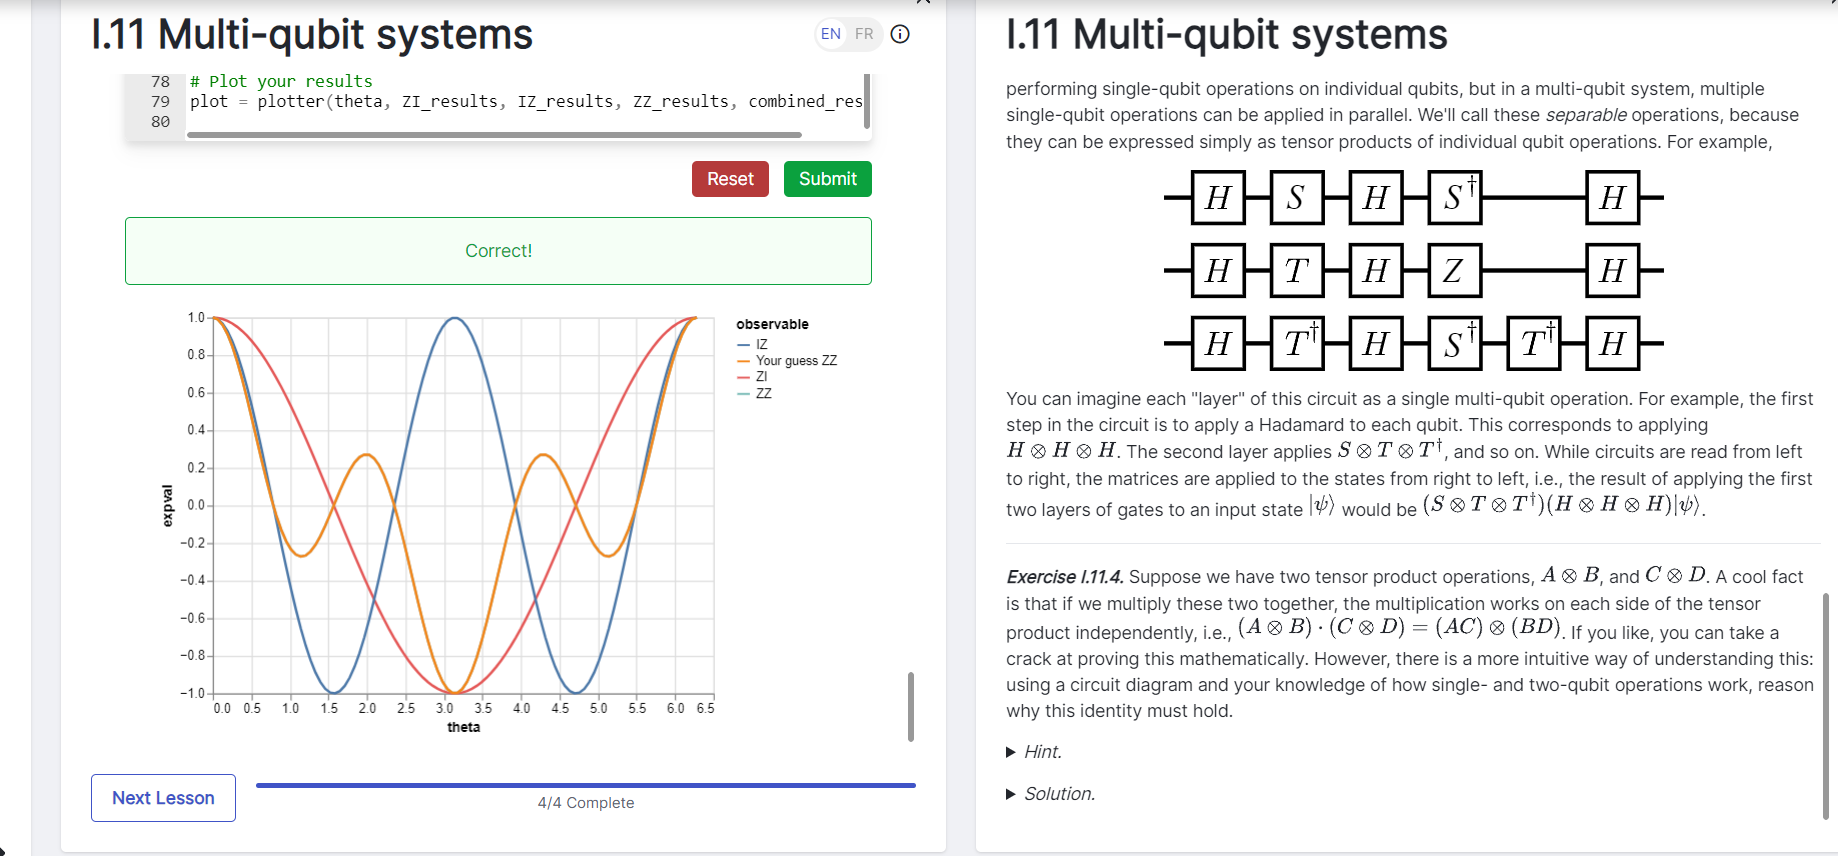

In [31]:
num_wires = 3
dev = qml.device('default.qubit', wires=num_wires)

@qml.qnode(dev)
def make_basis_state(basis_id):
    """Produce the 3-qubit basis state corresponding to |basis_id>.

    Note that the system starts in |000>.

    Args:
        basis_id (int): An integer value identifying the basis state to construct.

    Returns:
        array[complex]: The computational basis state |basis_id>.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # CREATE THE BASIS STATE
    s = "{0:03b}".format(basis_id)
    if s[0] == "1":
        qml.PauliX(wires=0)
    if s[1] == "1":
        qml.PauliX(wires=1)
    if s[2] == "1":
        qml.PauliX(wires=2)
    return qml.state()


basis_id = 3
print(f"Output state = {make_basis_state(basis_id)}")


Output state = [0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


In [32]:
# Creates a device with *two* qubits
dev = qml.device('default.qubit', wires=2)

@qml.qnode(dev)
def two_qubit_circuit():
    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE |+>|1>
    qml.Hadamard(wires=0)
    qml.PauliX(wires=1)
    # RETURN TWO EXPECTATION VALUES, Y ON FIRST QUBIT, Z ON SECOND QUBIT
    first = qml.expval(qml.PauliY(wires=0))
    second = qml.expval(qml.PauliZ(wires=1))
    return first, second


print(two_qubit_circuit())


(tensor(0., requires_grad=True), tensor(-1., requires_grad=True))


In [33]:
dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)
def create_one_minus():
    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE |1>|->
    qml.PauliX(wires = 0)
    qml.PauliX(wires = 1)
    qml.Hadamard(wires = 1)
    # RETURN A SINGLE EXPECTATION VALUE Z \otimes X
    first = (qml.PauliZ(wires=0))
    second = (qml.PauliX(wires=1))
    return qml.expval(first@second)


print(create_one_minus())


0.9999999999999996


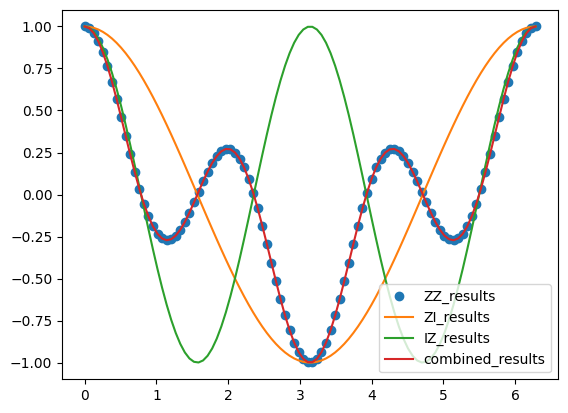

In [34]:
dev = qml.device('default.qubit', wires=2)

@qml.qnode(dev)
def circuit_1(theta):
    """Implement the circuit and measure Z I and I Z.

    Args:
        theta (float): a rotation angle.

    Returns:
        float, float: The expectation values of the observables Z I, and I Z
    """
    ##################
    # YOUR CODE HERE #
    ##################
    qml.RX(theta, wires = 0)
    qml.RY(2*theta, wires = 1)
    return qml.expval(qml.PauliZ(wires=0)), qml.expval(qml.PauliZ(wires=1))


@qml.qnode(dev)
def circuit_2(theta):
    """Implement the circuit and measure Z Z.

    Args:
        theta (float): a rotation angle.

    Returns:
        float: The expectation value of the observable Z Z
    """

    ##################
    # YOUR CODE HERE #
    ##################
    qml.RX(theta, wires = 0)
    qml.RY(2*theta, wires = 1)
    result = (qml.PauliZ(wires=0)) @ (qml.PauliZ(wires=1))
    return qml.expval(result)


def zi_iz_combination(ZI_results, IZ_results):
    """Implement a function that acts on the ZI and IZ results to
    produce the ZZ results. How do you think they should combine?

    Args:
        ZI_results (array[float]): Results from the expectation value of
            ZI in circuit_1.
        IZ_results (array[float]): Results from the expectation value of
            IZ in circuit_2.

    Returns:
        array[float]: A combination of ZI_results and IZ_results that
        produces results equivalent to measuring ZZ.
    """

    combined_results = np.zeros(len(ZI_results))

    ##################
    # YOUR CODE HERE #
    ##################
    combined_results = ZI_results * IZ_results

    return combined_results


theta = np.linspace(0, 2 * np.pi, 100)

# Run circuit 1, and process the results
circuit_1_results = np.array([circuit_1(t) for t in theta])

ZI_results = circuit_1_results[:, 0]
IZ_results = circuit_1_results[:, 1]
combined_results = zi_iz_combination(ZI_results, IZ_results)

# Run circuit 2
ZZ_results = np.array([circuit_2(t) for t in theta])

# Plot your results
#plot = plotter(theta, ZI_results, IZ_results, ZZ_results, combined_results)
plt.plot(theta, ZZ_results, "o", label = "ZZ_results")
plt.plot(theta, ZI_results, label = "ZI_results")
plt.plot(theta, IZ_results, label = "IZ_results")
plt.plot(theta, combined_results, label = "combined_results")
plt.legend(loc = 'lower right')

3. ReadXanaduQuantumCodebookI.12Tutorialandcomplete3exercises. (3points) https://codebook.xanadu.ai/I.12
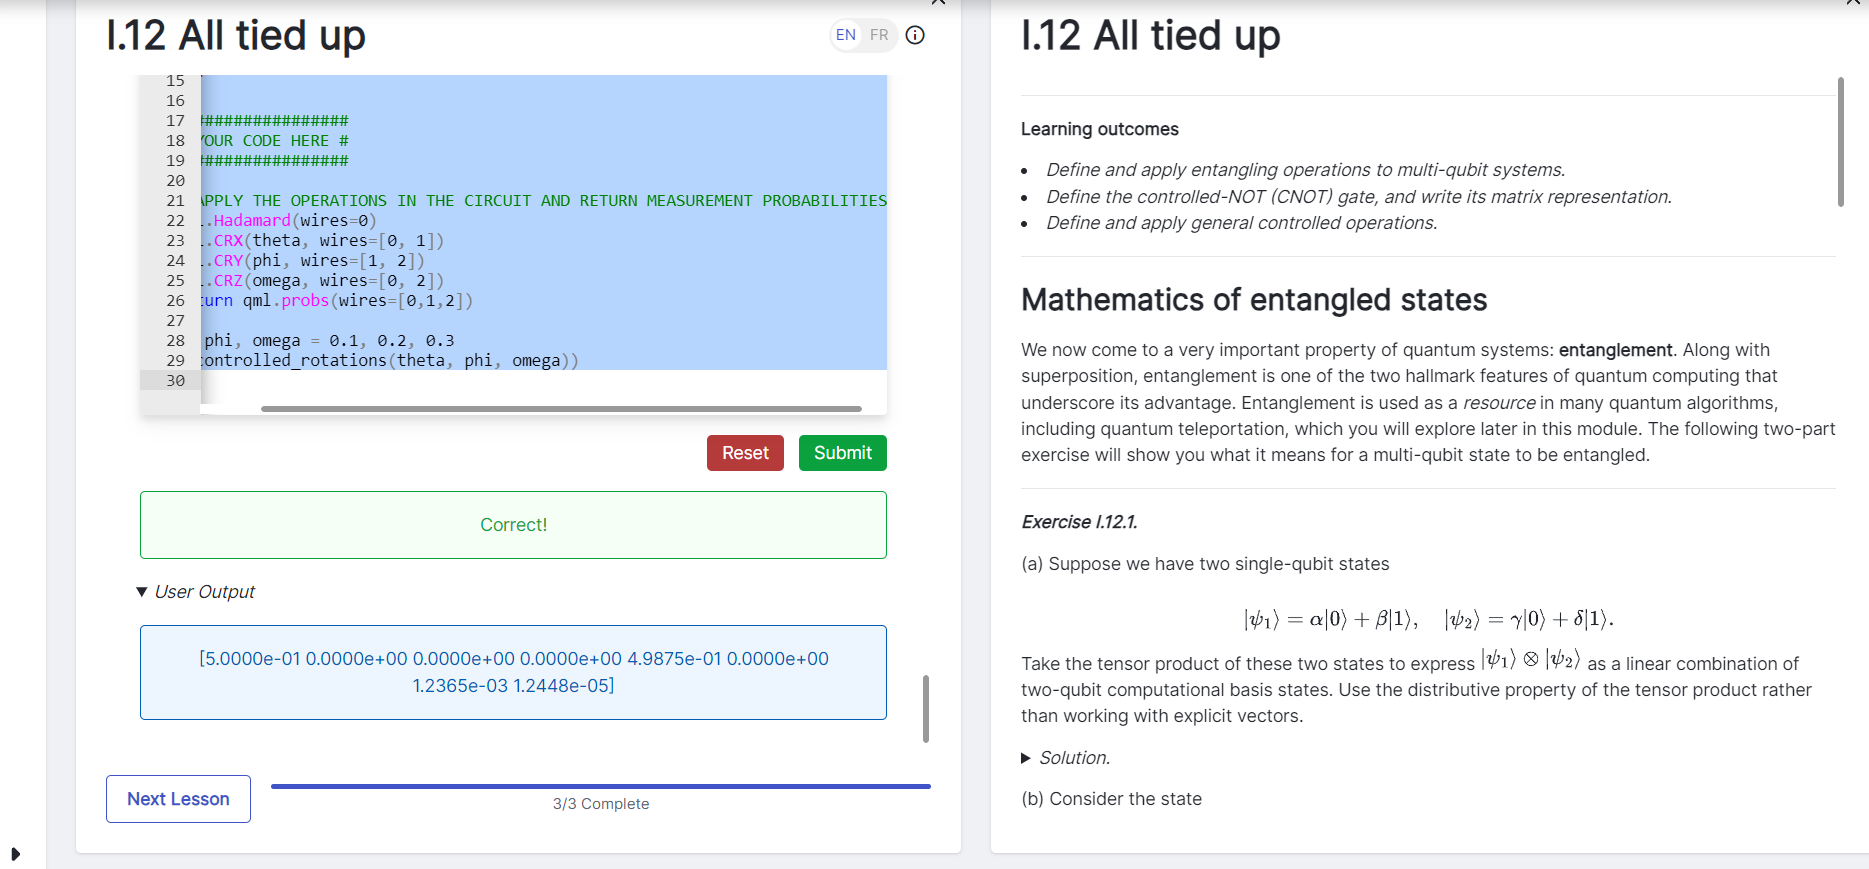

In [35]:

num_wires = 2
dev = qml.device('default.qubit', wires=num_wires)

@qml.qnode(dev)
def apply_cnot(basis_id):
    """Apply a CNOT to |basis_id>.

    Args:
        basis_id (int): An integer value identifying the basis state to construct.

    Returns:
        array[complex]: The resulting state after applying CNOT|basis_id>.
    """

    # Prepare the basis state |basis_id>
    bits = [int(x) for x in np.binary_repr(basis_id, width=num_wires)]
    qml.BasisStatePreparation(bits, wires=[0, 1])

    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY THE CNOT
    qml.CNOT(wires=[0, 1])
    return qml.state()


##################
# YOUR CODE HERE #
##################

# REPLACE THE BIT STRINGS VALUES BELOW WITH THE CORRECT ONES
cnot_truth_table = {
    "00" : "00",
    "01" : "00",
    "10" : "00",
    "11" : "00"
}


# Run your QNode with various inputs to help fill in your truth table
print(apply_cnot(0))


[1.+0.j 0.+0.j 0.+0.j 0.+0.j]


In [36]:

num_wires = 2
dev = qml.device('default.qubit', wires=num_wires)

@qml.qnode(dev)
def apply_cnot(basis_id):
    """Apply a CNOT to |basis_id>.

    Args:
        basis_id (int): An integer value identifying the basis state to construct.

    Returns:
        array[complex]: The resulting state after applying CNOT|basis_id>.
    """

    # Prepare the basis state |basis_id>
    bits = [int(x) for x in np.binary_repr(basis_id, width=num_wires)]
    qml.BasisStatePreparation(bits, wires=[0, 1])

    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY THE CNOT
    qml.CNOT(wires=[0, 1])
    return qml.state()


##################
# YOUR CODE HERE #
##################

# REPLACE THE BIT STRINGS VALUES BELOW WITH THE CORRECT ONES
cnot_truth_table = {
    "00" : "00",
    "01" : "01",
    "10" : "11",
    "11" : "10"
}


# Run your QNode with various inputs to help fill in your truth table
print(apply_cnot(0))
print(apply_cnot(1))
print(apply_cnot(2))
print(apply_cnot(3))

[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
[0.+0.j 1.+0.j 0.+0.j 0.+0.j]
[0.+0.j 0.+0.j 0.+0.j 1.+0.j]
[0.+0.j 0.+0.j 1.+0.j 0.+0.j]


In [37]:
dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)
def apply_h_cnot():
    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY THE OPERATIONS IN THE CIRCUIT
    qml.Hadamard(wires = 0)
    qml.CNOT(wires = [0, 1])
    return qml.state()


print(apply_h_cnot())

##################
# YOUR CODE HERE #
##################

# SET THIS AS 'separable' OR 'entangled' BASED ON YOUR OUTCOME
state_status = "entangled"


[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


In [38]:
dev = qml.device('default.qubit', wires=3)

@qml.qnode(dev)
def controlled_rotations(theta, phi, omega):
    """Implement the circuit above and return measurement outcome probabilities.

    Args:
        theta (float): A rotation angle
        phi (float): A rotation angle
        omega (float): A rotation angle

    Returns:
        array[float]: Measurement outcome probabilities of the 3-qubit
        computational basis states.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY THE OPERATIONS IN THE CIRCUIT AND RETURN MEASUREMENT PROBABILITIES
    qml.Hadamard(wires=0)
    qml.CRX(theta, wires=[0, 1])
    qml.CRY(phi, wires=[1, 2])
    qml.CRZ(omega, wires=[0, 2])
    return qml.probs(wires=[0,1,2])

theta, phi, omega = 0.1, 0.2, 0.3
print(controlled_rotations(theta, phi, omega))


[5.00000000e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4.98751041e-01 0.00000000e+00 1.23651067e-03 1.24480103e-05]
